In [45]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing and model splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Metrics and evaluation
from sklearn.metrics import accuracy_score  # Calculates accuracy of predictions
from sklearn.metrics import precision_score  # Measures precision (positive predictive value)
from sklearn.metrics import recall_score  # Measures recall (sensitivity)
from sklearn.metrics import roc_auc_score  # Calculates ROC AUC score
from sklearn.metrics import f1_score  # Calculates F1 score (harmonic mean of precision and recall)
from sklearn.metrics import confusion_matrix  # Generates confusion matrix
from sklearn.metrics import classification_report  # Detailed classification report with precision, recall, f1-score, support
from sklearn.metrics import ConfusionMatrixDisplay  # Visualization of confusion matrix

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Save/load models
import pickle

In [46]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/diabetes_dataset/diabetes_dataset.csv")

# Display the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# Check the number of rows and columns in the dataset (rows, columns)
df.shape

(768, 9)

In [48]:
# Check the data types of each column in the DataFrame
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [49]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
# Get summary statistics for each numeric column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# Check for missing values (NaNs) in each column
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [52]:
# Count the unique values in the 'Outcome' column to see the distribution of classes
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [53]:
# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)   # All columns except 'Outcome' are features
y = df['Outcome']                # 'Outcome' is the target variable (labels)

# Initialize SMOTE to balance the minority class by oversampling it
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the features and target to create a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show class distribution before applying SMOTE
print("Before SMOTE:\n", y.value_counts())

# Show class distribution after applying SMOTE (balanced)
print("After SMOTE:\n", y_resampled.value_counts())


Before SMOTE:
 Outcome
0    500
1    268
Name: count, dtype: int64
After SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64


In [54]:
# Display all unique values in the 'Outcome' column to see the different classes/labels
df['Outcome'].unique()

array([1, 0])

In [55]:
# Group the DataFrame by the 'Outcome' column
df.groupby('Outcome')

In [56]:
# Group the data by 'Outcome' and calculate the mean of each feature for each group
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [57]:
# Display the first 5 rows of the resampled feature dataset after applying SMOTE
X_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [58]:
# Display the first 5 values of the resampled target variable after applying SMOTE
y_resampled.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Data Standardization

In [59]:
# Initialize the StandardScaler to normalize/standardize the features
std_scale = StandardScaler()

In [60]:
# Fit the StandardScaler to the resampled features data to compute the mean and std for scaling
std_scale.fit(X_resampled)

StandardScaler()

In [61]:
# Transform the resampled features using the fitted scaler to standardize the data
standardized_data =std_scale.transform(X_resampled)

In [62]:
# Display the standardized feature data after scaling with StandardScaler
standardized_data

array([[ 0.63294236,  0.70459938,  0.14812026, ...,  0.12159194,
         0.38498862,  1.41593023],
       [-0.88563336, -1.26050581, -0.15488743, ..., -0.8112318 ,
        -0.43879908, -0.26234016],
       [ 1.24037265,  1.79632449, -0.25589   , ..., -1.25099156,
         0.51930183, -0.17401014],
       ...,
       [ 0.02551207,  1.42201874,  0.70363436, ...,  0.08161378,
         2.08429804,  1.50426025],
       [ 1.24037265, -0.44951002,  0.6026318 , ...,  0.19796319,
        -0.63798181,  0.09097992],
       [ 0.02551207,  0.5798308 ,  0.50162923, ...,  0.63175999,
         0.21475525,  0.4443    ]])

In [63]:
# Assign the standardized features to X for model input
X = standardized_data
# Assign the original target labels from the dataframe to Y
Y = df['Outcome']

In [64]:
# Display the feature data stored in X (standardized/scaled features)
X

array([[ 0.63294236,  0.70459938,  0.14812026, ...,  0.12159194,
         0.38498862,  1.41593023],
       [-0.88563336, -1.26050581, -0.15488743, ..., -0.8112318 ,
        -0.43879908, -0.26234016],
       [ 1.24037265,  1.79632449, -0.25589   , ..., -1.25099156,
         0.51930183, -0.17401014],
       ...,
       [ 0.02551207,  1.42201874,  0.70363436, ...,  0.08161378,
         2.08429804,  1.50426025],
       [ 1.24037265, -0.44951002,  0.6026318 , ...,  0.19796319,
        -0.63798181,  0.09097992],
       [ 0.02551207,  0.5798308 ,  0.50162923, ...,  0.63175999,
         0.21475525,  0.4443    ]])

In [65]:
# Initialize the Logistic Regression model with a maximum of 500 iterations
lg = LogisticRegression(max_iter=500)

# Train (fit) the Logistic Regression model on the resampled (balanced) training data
lg.fit(X_resampled, y_resampled)

# Predict the target labels for the training data using the trained model
lg_predict = lg.predict(X_resampled)

# Calculate the accuracy score by comparing the predicted labels with the true labels (y_resampled)
lg_accuracy = accuracy_score(y_resampled, lg_predict)

# Print the accuracy score on the training data
print("The accuracy score for training data is : ", lg_accuracy)


The accuracy score for training data is :  0.751


In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,       # Features after SMOTE balancing
    y_resampled,       # Corresponding target labels after SMOTE balancing
    test_size=0.2,     # 20% of data will be kept aside for testing
    stratify=y_resampled,  # Ensure train and test sets have same class distribution as original balanced data
    random_state=2     # Seed for reproducibility of the split
)


Training Model

In [67]:
# Create an SVM classifier with a linear kernel
classifier = svm.SVC(kernel="linear")

In [68]:
# Train (fit) the SVM classifier on the training data (features and labels)
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [69]:
# Use the trained SVM model to predict labels for the training data
X_train_prediction = classifier.predict(X_train)

In [70]:
# Predicted class labels for the training data using the trained SVM model
X_train_prediction

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [71]:
# Calculate the accuracy score of the model on the training dataset
X_train_accuracy =accuracy_score(X_train_prediction,y_train)

In [72]:
# Print the accuracy score of the model on the training dataset
print("Accuracy score for training data: " , X_train_accuracy)

Accuracy score for training data:  0.755


In [73]:
# Predict the class labels for the testing dataset using the trained classifier
X_test_predict = classifier.predict(X_test)
# Display the predicted labels for the test set
X_test_predict

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1])

In [ ]:
# Calculate the accuracy of the model on the test data by comparing predicted labels with true labels
X_test_accuracy = accuracy_score(X_test_predict,y_test)

In [77]:
# Print the accuracy score of the model on the test dataset
print("Accuracy Score for Testing Data: ", X_test_accuracy)

Accuracy Score for Testing Data:  0.705


Make a Predictive System to predict whether a person is diabetic or not

In [78]:
# List of feature column names expected by the model
feature_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                   "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Input data tuple representing one sample with values for each feature
input = (10, 168, 74, 0, 0, 38, 0.537, 34)

# Convert the input tuple into a DataFrame with the same column names as training data
input_df = pd.DataFrame([input], columns=feature_columns)

# Apply the same scaling (standardization) as was applied to training data
std_data = std_scale.transform(input_df)

# Print the scaled input data, ready to be used for prediction
print(std_data)

[[ 1.84780294  1.3284423   0.24912282 -1.30197843 -0.71924071  0.70793829
   0.1163622   0.0026499 ]]


In [79]:
# Predict the class (0 or 1) for the given standardized input data using the trained SVM classifier
prediction = classifier.predict(std_data)
# Output the predicted label
print(prediction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [80]:
#print message as diabetic or not
if (prediction[0] == 0):
    print("Assessment shows no diabetes risk.")
else:
    print("Assessment indicates potential diabetes risk.")

Assessment shows no diabetes risk.


Choosing a RandomForest Classifier

The accuracy Score for Training Data:  0.84375
The accuracy Score for Testing Data:  0.77
Training Precision: 0.8146453089244852
Training Recall: 0.89
Training F1 Score: 0.8506571087216248
Training ROC-AUC Score: 0.925025
Testing Precision: 0.7596153846153846
Testing Recall: 0.79
Testing F1 Score: 0.7745098039215687
Testing ROC-AUC Score: 0.8043999999999999


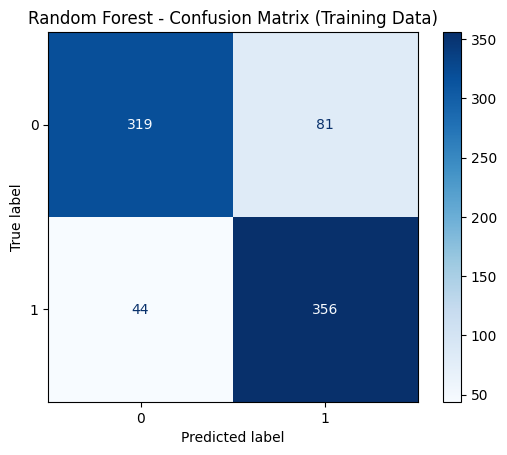

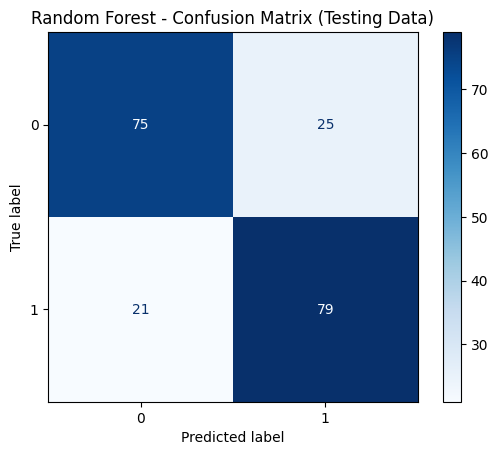

In [81]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=5, max_depth=5)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict with training data
rf_train_predict = rf_classifier.predict(X_train)

# Accuracy Score for Training data
rf_train_accuracy = accuracy_score(y_train, rf_train_predict)
print("The accuracy Score for Training Data: ", rf_train_accuracy)

# Predict with testing data
rf_test_predict = rf_classifier.predict(X_test)

# Accuracy Score for Testing data
rf_test_accuracy = accuracy_score(y_test, rf_test_predict)
print("The accuracy Score for Testing Data: ", rf_test_accuracy)

# Set average type ('binary' for binary classification, 'macro' or 'weighted' for multiclass)
average_type = 'binary'  # Change to 'macro' or 'weighted' if multiclass

# --- Training Data Metrics ---
rf_train_precision = precision_score(y_train, rf_train_predict, average=average_type)
rf_train_recall = recall_score(y_train, rf_train_predict, average=average_type)
rf_train_f1 = f1_score(y_train, rf_train_predict, average=average_type)

# For ROC-AUC, need predicted probabilities
rf_train_proba = rf_classifier.predict_proba(X_train)
if len(rf_classifier.classes_) == 2:
    rf_train_roc_auc = roc_auc_score(y_train, rf_train_proba[:, 1])
else:
    rf_train_roc_auc = roc_auc_score(y_train, rf_train_proba, multi_class='ovr', average=average_type)

print("Training Precision:", rf_train_precision)
print("Training Recall:", rf_train_recall)
print("Training F1 Score:", rf_train_f1)
print("Training ROC-AUC Score:", rf_train_roc_auc)

# --- Testing Data Metrics ---
rf_test_precision = precision_score(y_test, rf_test_predict, average=average_type)
rf_test_recall = recall_score(y_test, rf_test_predict, average=average_type)
rf_test_f1 = f1_score(y_test, rf_test_predict, average=average_type)

rf_test_proba = rf_classifier.predict_proba(X_test)
if len(rf_classifier.classes_) == 2:
    rf_test_roc_auc = roc_auc_score(y_test, rf_test_proba[:, 1])
else:
    rf_test_roc_auc = roc_auc_score(y_test, rf_test_proba, multi_class='ovr', average=average_type)

print("Testing Precision:", rf_test_precision)
print("Testing Recall:", rf_test_recall)
print("Testing F1 Score:", rf_test_f1)
print("Testing ROC-AUC Score:", rf_test_roc_auc)

# Confusion Matrix for Training Data
cm_train_rf = confusion_matrix(y_train, rf_train_predict)
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=rf_classifier.classes_)
disp_train_rf.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix (Training Data)")
plt.show()

# Confusion Matrix for Testing Data
cm_test_rf = confusion_matrix(y_test, rf_test_predict)
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=rf_classifier.classes_)
disp_test_rf.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix (Testing Data)")
plt.show()



The accuracy score for Training data is : 0.75625
The accuracy score for Testing data is : 0.74
Training Precision: 0.7690288713910761
Training Recall: 0.7325
Training F1 Score: 0.7503201024327785
Training ROC-AUC Score: 0.84705625
Testing Precision: 0.7608695652173914
Testing Recall: 0.7
Testing F1 Score: 0.7291666666666666
Testing ROC-AUC Score: 0.8211999999999999


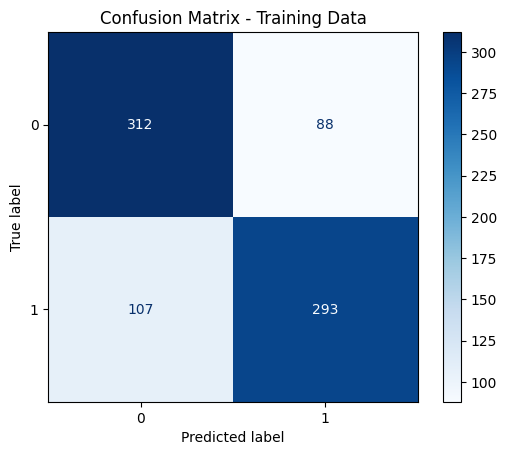

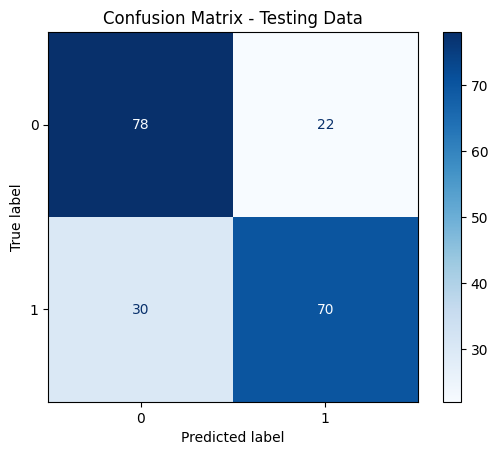

In [82]:
# Initialize Logistic Regression
lg_reg = LogisticRegression(max_iter=500)

# Fit the model
lg_reg.fit(X_train, y_train)

# Predict with training data
lg_reg_train_predict = lg_reg.predict(X_train)

# Accuracy Score for Training data
lg_reg_train_accuracy = accuracy_score(y_train, lg_reg_train_predict)
print("The accuracy score for Training data is :", lg_reg_train_accuracy)

# Predict with testing data
lg_reg_test_predict = lg_reg.predict(X_test)

# Accuracy Score for Testing data
lg_reg_test_accuracy = accuracy_score(y_test, lg_reg_test_predict)
print("The accuracy score for Testing data is :", lg_reg_test_accuracy)

# Set average type ('binary' for binary classification, 'macro' or 'weighted' for multiclass)
average_type = 'binary'  # Change if multiclass

# --- Training Data Metrics ---
lg_train_precision = precision_score(y_train, lg_reg_train_predict, average=average_type)
lg_train_recall = recall_score(y_train, lg_reg_train_predict, average=average_type)
lg_train_f1 = f1_score(y_train, lg_reg_train_predict, average=average_type)

# For ROC-AUC, need predicted probabilities
lg_train_proba = lg_reg.predict_proba(X_train)
if len(lg_reg.classes_) == 2:
    lg_train_roc_auc = roc_auc_score(y_train, lg_train_proba[:, 1])
else:
    lg_train_roc_auc = roc_auc_score(y_train, lg_train_proba, multi_class='ovr', average=average_type)

print("Training Precision:", lg_train_precision)
print("Training Recall:", lg_train_recall)
print("Training F1 Score:", lg_train_f1)
print("Training ROC-AUC Score:", lg_train_roc_auc)

# --- Testing Data Metrics ---
lg_test_precision = precision_score(y_test, lg_reg_test_predict, average=average_type)
lg_test_recall = recall_score(y_test, lg_reg_test_predict, average=average_type)
lg_test_f1 = f1_score(y_test, lg_reg_test_predict, average=average_type)

lg_test_proba = lg_reg.predict_proba(X_test)
if len(lg_reg.classes_) == 2:
    lg_test_roc_auc = roc_auc_score(y_test, lg_test_proba[:, 1])
else:
    lg_test_roc_auc = roc_auc_score(y_test, lg_test_proba, multi_class='ovr', average=average_type)

print("Testing Precision:", lg_test_precision)
print("Testing Recall:", lg_test_recall)
print("Testing F1 Score:", lg_test_f1)
print("Testing ROC-AUC Score:", lg_test_roc_auc)


# For Training Data
cm_train = confusion_matrix(y_train, lg_reg_train_predict)  # or rf_train_predict for RandomForest
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=lg_reg.classes_)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()

# For Testing Data
cm_test = confusion_matrix(y_test, lg_reg_test_predict)  # or rf_test_predict for RandomForest
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lg_reg.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Testing Data")
plt.show()


In [83]:
# Save the model

#save the model as pickle file
pickle.dump(lg_reg,open('diabetes_model.pkl','wb'))

#save standard scaler
pickle.dump(std_scale,open('diabetes_std_scaler_model.pkl','wb'))